In [1]:
import os

In [2]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [3]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

In [4]:
import cv2

In [5]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png')

In [6]:
import matplotlib.pyplot as plt

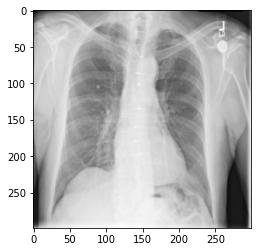

In [7]:
plt.imshow(img)

In [8]:
img.shape

(299, 299, 3)

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [11]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [12]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [13]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]

In [14]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'

In [19]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [20]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [21]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [22]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [23]:
# covidImages = np.asarray(covidImages)
# normalImages = np.asarray(normalImages)

In [24]:
covidImages.shape

(3616, 100, 100, 3)

In [25]:
normalImages.shape

(10192, 100, 100, 3)

In [26]:
data = np.r_[covidImages, normalImages]

In [27]:
data.shape

(13808, 100, 100, 3)

In [28]:
targets = np.r_[covidTargets, normalTargets]

In [29]:
targets.shape

(13808,)

In [30]:
# data = data / 255.0

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [34]:
import tensorflow as tf

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [39]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 16)      

In [41]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
324/324 [==============================] - 44s 133ms/step - loss: 0.3577 - accuracy: 0.8360 - val_loss: 0.2539 - val_accuracy: 0.8963
Epoch 2/5
324/324 [==============================] - 41s 127ms/step - loss: 0.2358 - accuracy: 0.9015 - val_loss: 0.1887 - val_accuracy: 0.9224
Epoch 3/5
324/324 [==============================] - 38s 116ms/step - loss: 0.1949 - accuracy: 0.9191 - val_loss: 0.1735 - val_accuracy: 0.9293
Epoch 4/5
324/324 [==============================] - 38s 116ms/step - loss: 0.1602 - accuracy: 0.9358 - val_loss: 0.1824 - val_accuracy: 0.9232
Epoch 5/5
324/324 [==============================] - 38s 117ms/step - loss: 0.1442 - accuracy: 0.9429 - val_loss: 0.1623 - val_accuracy: 0.9357


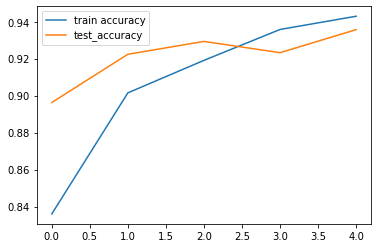

In [45]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

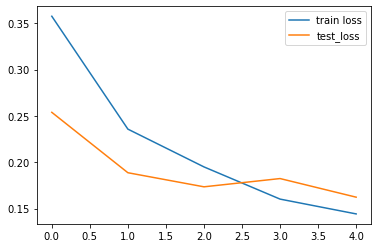

In [46]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()